Q2. Verify Curse of Dimensionality


In [55]:
import math
import random
from scipy.spatial import distance
from scipy.spatial.distance import cdist #Compute distance between each pair of the two collections of inputs.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

calculate gamma value: log((maxval- minval) /*minval*)



In [56]:
def get_gamma_value(max_val, min_val):
    if min_val == 0: #handle divide by 0 case
        return 0
    return math.log((max_val - min_val) / min_val)


Generates n d-dimensional random points between range 1-100


In [71]:
def generate_random_points(n, d):
  random_points_matrix=np.random.rand(n,d)*100
  return random_points_matrix

Calculate L1-norm and euclidean distances

In [58]:
def get_distance(v1, v2, metric):
    dist = pd.DataFrame(cdist(v1, v2, metric=metric))
    np.fill_diagonal(dist.values, np.inf)
    min_dist = dist.min().min()
    np.fill_diagonal(dist.values, 0)
    max_dist = dist.max().max()
    return max_dist, min_dist


Get gamma for Euclidean and L1 norm

In [59]:
def get_dist_values_instance(n, d):
    data_matrix = generate_random_points(n, d)
    df = pd.DataFrame(data_matrix)

    # euclidean distance = sqrt(a1^2 + a2^2 + a3^2)
    max_dist_val, min_dist_val = get_distance(df.values, df.values, "euclidean")
    gamma_value_e = get_gamma_value(max_dist_val, min_dist_val)
    
    # l1 norm distance / manhattan distance =  sum of the absolute vector values i.e |a1|+|a2|+|a3|
    max_dist_val_m, min_dist_val_m = get_distance(df.values, df.values, "cityblock")
    gamma_value_m = get_gamma_value(max_dist_val_m, min_dist_val_m)

    return gamma_value_e, gamma_value_m

 3-D surface of γ(d, n) when euclidean distance is used to calculate the distance

In [60]:
def plot_euclidean(dict):
    fig = plt.figure()
    ax=Axes3D(fig)
    l = ax.plot_trisurf(dict["d"], dict["n"], dict["Euclidian"], linewidth=0.1, antialiased=True, cmap="jet", edgecolor=None)
    ax.set_xlabel("d", fontsize=20)
    ax.set_ylabel("n", fontsize=20)
    ax.set_zlabel(r"$\gamma$ euclidean", fontsize=20)
    fig.colorbar(l)
    plt.savefig("euclidean.pdf", bbox_inches='tight')


 3-D surface of γ(d, n) when l1 norm or manhattan distance measure is used to calculate the distance

In [61]:
def plot_l1_norm(dict):
    fig = plt.figure()
    ax=Axes3D(fig)
    l = ax.plot_trisurf(dict["d"], dict["n"], dict["L1-Norm"], linewidth=0.1, cmap="hsv", antialiased=True)
    ax.set_xlabel(r"$d$", fontsize=20)
    ax.set_ylabel(r"$n$", fontsize=20)
    ax.set_zlabel(r"$\gamma$ l1 norm")
    fig.colorbar(l)
    plt.savefig("L1-Norm.pdf", bbox_inches='tight')


Main driver function

In [72]:
def verify_curse_of_dimensionality():
    #store values in the dictionary for plotting
    final_dict = {"n": [], "d": [], "Euclidian": [], "L1-Norm": []}
    for i in range(100, 1001): #n
        for j in range(1, 101): #d
            gamma_e, gamma_m = get_dist_values_instance(i, j)
            final_dict["n"].append(i)
            final_dict["d"].append(j)
            final_dict["Euclidian"].append(gamma_e)
            final_dict["L1-Norm"].append(gamma_m) 
    plot_euclidean(final_dict)
    plot_l1_norm(final_dict)


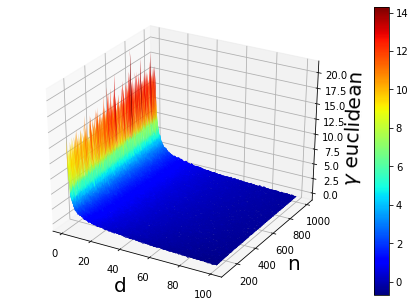

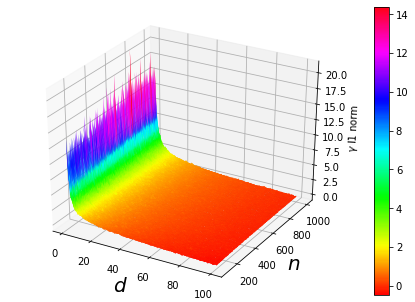

In [73]:
verify_curse_of_dimensionality()